# Netflix Data Analyzation 

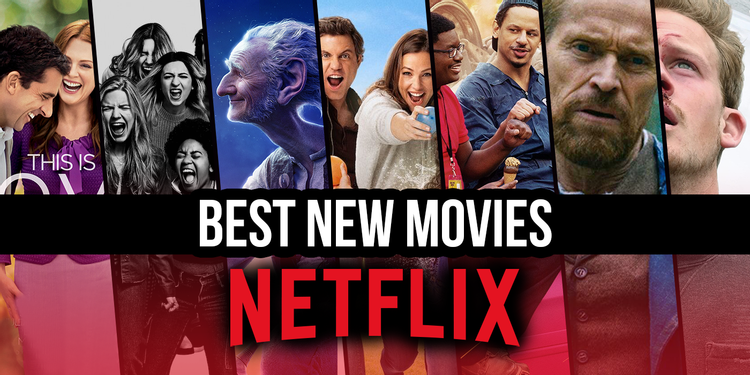

Netflix has become a popular platform to stream movies and series lately ever since it came into existence in 1997, with over two-hundred million subscribers worldwide as of April 2021. With more and more movies and shows being released on Netflix, how does one decide what to watch and not watch?

After looking at the Netflix data, my friend inspected that from the years of 2011 to 2020, the average duration of movies were 103, 102, 99, 100, 100, 95, 95, 96, 93, and 90, respectively. He then suggests that over the years, the average duration of movies have been getting shorter. 

The objective of this exploratory analysis is to prove whether my friend's statement is correct, and if so, to determine the cause of of the decline in the average movie duration. 

## Creating a DataFrame from a Dictionary and Plotting the Chart

1. Create dictionary for the friend's stored data 
2. Convert dictionary to a pandas DataFrame by importing pandas 
3. Create a line plot to visualize the trend

In [2]:
#Create the years and duration lists of friends data 
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

#Create a dictionary with two lists 
movie_dict = {'years':years, 'durations':durations}

#print the dictionary 
movie_dict 

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [3]:
#Import pandas under alias pd 
import pandas as pd 

#Create DataFrame from the dictionary 
durations_df = pd.DataFrame(movie_dict)

#Print the DataFrame 
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


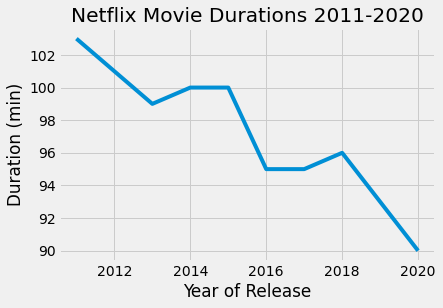

In [63]:
#Import matplotlib.pyplot under its usual alias and create a figure 
import matplotlib.pyplot as plt 
fig = plt.figure()

#Draw a line plot of release_years and durations 
plt.plot(durations_df['years'],durations_df['durations'])

#Create a title 
plt.title("Netflix Movie Durations 2011-2020")
plt.xlabel("Year of Release")
plt.ylabel("Duration (min)")
#Show the plot 
plt.show()

Looking at the line plot, it is clear that there seems to be a downward trend of the average duration of movies going from 103 minutes in the year 2011 down to 90 minutes in 2020. 

However, there is much more to explore with this dataset. We will want to see if this trend continues over a longer period of time as well as if there is an explainable cause such as the genre or country released of the entertainment.

## Loading the rest of the data from a CSV 

Using the original CSV file, create another DataFrame and inspect the first five rows of the data. 
    

In [5]:
#Read in the CSV as a DataFrame 
netflix_df = pd.read_csv("netflix_data.csv")

#Print the first five rows of the DataFrame 
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [7]:
#Get the shape of the data 
netflix_df.shape

(7787, 11)

Overall, there are 7,787 TV shows and movies in the dataset with 11 variables of which includes the show's id, the type (TV Show or Movie), the title, director, casts, country it was filmed in, date added, release year, a description, and the genre. 

Of course, we are only interested in movies and not TV shows. We will also only be looking at the country, release year, duration, and genre variables of this dataset. 

## Filtering for Movies

1. Filter the data to select only "Movie" type 
2. Also create a new dataframe with only columns of interests (title, country, genre, release_year, duration) 

In [11]:
#Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df["type"]=='Movie']

#Select only the columns of interest 
netflix_movies_col_subset = netflix_df_movies_only[["title", 'country', "genre", "release_year", "duration"]]

#Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [12]:
#Get the shape of the data 
netflix_movies_col_subset.shape

(5377, 5)

There are now only 5,377 observations all of which are movies in the new subset of the netflix data. 

Next, we will want to see the trend of this new subset by visualizing the data with a scatter plot. 

## Creating a Scatter Plot

1. Visualize the data to inspect the data over a longer range of time. 
2. Use a scatterplot of year vs. duration 

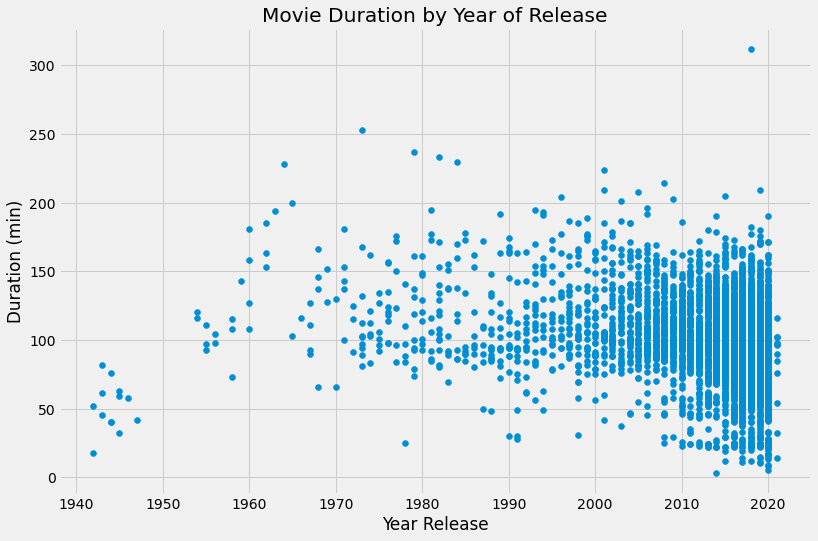

In [64]:
#Create a figure and increase the figure size 
fig = plt.figure(figsize=(12,8))

#Create a scatterplot of duration versus year 
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])
plt.title("Movie Duration by Year of Release")
plt.xlabel("Year Release")
plt.ylabel("Duration (min)")

#Show the plot 
plt.show()

Aside from the decade betwen 1940-1950, we see that from the year 1990 - 2021, there seems to be some movies that are less than an hour long, which could be dragging the average duration downwards. 

## Diving Deeper into the Dataset

Upon further inspection, something else is going on. Some films are under an hour long. 

1. Filter out films under 60 min and see what may be decreasing the average duration. 

In [65]:
#Filter for durations shorter than 60 minutes 
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"]< 60]

#Print the first 20 rows of short_movies
short_movies

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
7679,WWII: Report from the Aleutians,United States,Documentaries,1943,45
7692,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
7718,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54
7771,Zion,United States,Documentaries,2018,12


In [66]:
#find the unique types of genre that consists of movies less than an hour
short_movies.genre.unique()

array(['Documentaries', 'Uncategorized', 'Children', 'Stand-Up',
       'Comedies', 'Dramas', 'International Movies', 'Action', 'Music',
       'Classic Movies', 'Anime Features', 'Horror Movies'], dtype=object)

In [67]:
#find how many of each are there 
#Group by count of all genre 
genre_count_table = short_movies.groupby("genre")['title'].count()
genre_count_table


genre
Action                    6
Anime Features            3
Children                107
Classic Movies            8
Comedies                 15
Documentaries           151
Dramas                   12
Horror Movies             1
International Movies      3
Music                     2
Stand-Up                 72
Uncategorized            40
Name: title, dtype: int64

It looks as though many films that are under 60 minutes fall into genres such as "Children","Documentaries", and "Stand-up". This is a logical result as these types of genre films are probably often shorter than 90 minute Hollywood blockbuster. 

We will want to eliminate these rows from our DataFrame and plot the value again. Or we can just plot these data with a different color to see their effects on the data. 

## Visualizing the Data with colors 

In [68]:
#Define an empty list 
colors = []

#Iterate over rows of netflix_movies_col_subset
for lab, row, in netflix_movies_col_subset.iterrows(): 
    if row['genre'] == "Children": 
        colors.append("red")
    elif row['genre'] == "Documentaries": 
        colors.append("blue")
    elif row['genre'] == "Stand-Up": 
        colors.append("green")
    else: 
        colors.append("black")

#Inspect the first 10 values in your list 
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

<function matplotlib.pyplot.show(close=None, block=None)>

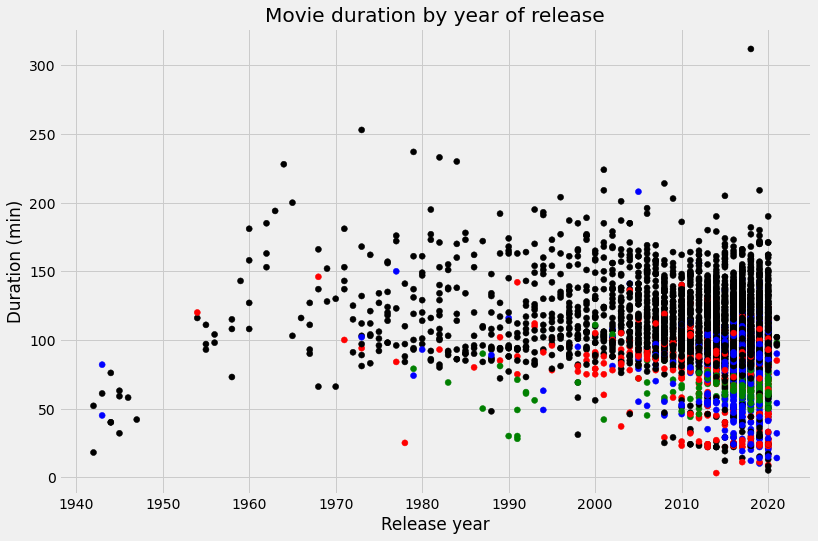

In [69]:
#Set the figure style and initialize a new figure 
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

#Create a scatterplot of duration versus release_year 
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], c=colors)

#Create a title and axis labels 
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

#Show the plot 
plt.show


Red points represent children genres, blue points represent documentary genres,green points represent stand-up genres, and black points represent all other genres. Looking at this scatter plot, we see that movies of genre children, documentary, and stand-up have significantly lower average duration compared to the other genres as they appear to be mainly under 120 minutes long. 

Thus, we will remove these genres from our dataset. Then,to check the trend of average duration over time, we will categorize each movie into the decade they were release in and find the average duration of movies during that decade. 

In [72]:
#import numpy as np 
import numpy as np 

#removing the films with genre children, documentaries, stand-up, and Uncategorized by filtering
Longer_movies = netflix_movies_col_subset[-netflix_movies_col_subset['genre'].isin (["Children", "Documentaries", "Stand-Up", "Uncategorized"])]

#Print the first 20 rows of short_movies
Longer_movies

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
7774,Zodiac,United States,Cult Movies,2007,158
7778,Zombieland,United States,Comedies,2009,88
7780,Zoo,India,Dramas,2018,94
7782,Zozo,Sweden,Dramas,2005,99


In [73]:
#Count how many movies were released during each year
Genre_year_count_table = Longer_movies.groupby("release_year")['title'].count()
Genre_year_count_table

release_year
1942      2
1943      1
1944      3
1945      3
1946      1
       ... 
2017    471
2018    496
2019    367
2020    235
2021      5
Name: title, Length: 72, dtype: int64

We see that in some years such as from 1942 - 1946, there were less than 5 films. To combat this, we will categorize the year they were release into the decade they were release in. 

In [74]:
#Add a new column to Longer_movies where it categorizes release_year into decades 

#create a list of our conditions 
conditions = [
    (Longer_movies['release_year'] <= 1950),
    (Longer_movies['release_year'] > 1950) & (Longer_movies['release_year'] <= 1960), 
    (Longer_movies['release_year'] > 1960) & (Longer_movies['release_year'] <= 1970), 
    (Longer_movies['release_year'] > 1970) & (Longer_movies['release_year'] <= 1980),
    (Longer_movies['release_year'] > 1980) & (Longer_movies['release_year'] <= 1990), 
    (Longer_movies['release_year'] > 1990) & (Longer_movies['release_year'] <= 2000),
    (Longer_movies['release_year'] > 2000) & (Longer_movies['release_year'] <= 2010),
    (Longer_movies['release_year'] > 2010) & (Longer_movies['release_year'] <= 2021)
    ]
    

#create a list of values we want to assign for each condition
values = ["1941-1950","1951-1960","1961-1970","1971-1980","1981-1990","1991-2000","2001-2010","2011-2021"]

#create a new column and use np.select to assign vlaues to it using our lists as arguments
Longer_movies['decade_release'] = np.select(conditions, values)

Longer_movies

<ipython-input-74-f3c4ba0c1427>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Longer_movies['decade_release'] = np.select(conditions, values)


,title,country,genre,release_year,duration,decade_release
1,7:19,Mexico,Dramas,2016,93,2011-2021
2,23:59,Singapore,Horror Movies,2011,78,2011-2021
3,9,United States,Action,2009,80,2001-2010
4,21,United States,Dramas,2008,123,2001-2010
6,122,Egypt,Horror Movies,2019,95,2011-2021
...,...,...,...,...,...,...
7774,Zodiac,United States,Cult Movies,2007,158,2001-2010
7778,Zombieland,United States,Comedies,2009,88,2001-2010
7780,Zoo,India,Dramas,2018,94,2011-2021
7782,Zozo,Sweden,Dramas,2005,99,2001-2010


In [75]:
#group by decade_release and find the average duration 
decade_release_duration_avg = Longer_movies.groupby("decade_release")['duration'].mean()
decade_release_duration_avg

decade_release
1941-1950     49.181818
1951-1960    116.571429
1961-1970    137.263158
1971-1980    124.885246
1981-1990    120.147368
1991-2000    119.839080
2001-2010    117.207612
2011-2021    106.232558
Name: duration, dtype: float64

In [78]:
#group by decade_release & genre and find the average duration of each
decade_genre_duration_avg = Longer_movies.groupby(["decade_release","genre"])['duration'].mean()
decade_genre_duration_avg 

#Create a pivot_table 
decade_genre_dur_avg_pt = Longer_movies.pivot_table( values = 'duration', index = ["decade_release","genre"]) 
decade_genre_dur_avg_pt

duration
decade_release genre                           
1941-1950      Classic Movies         49.181818
1951-1960      Action                135.333333
               Classic Movies        102.777778
               Comedies              158.000000
               Dramas                143.000000
1961-1970      Action                164.000000
               Classic Movies        138.900000
               Comedies              114.500000
               Cult Movies            66.000000
               Dramas                134.000000
1971-1980      Action                120.320000
               Classic Movies        124.789474
               Comedies              174.666667
               Cult Movies            89.500000
               Dramas                112.125000
               International Movies  115.000000
1981-1990      Action                122.275862
               Classic Movies        116.583333
               Comedies              128.590909
               Cult Movies           101.666667
               Dramas                115.892857
               Horror Movies          90.000000
1991-2000      Action                117.627451
               Classic Movies        127.333333
               Comedies              110.081633
               Cult Movies            99.333333
               Dramas                134.200000
               Horror Movies         111.000000
               Thrillers             109.200000
2001-2010      Action                114.643836
               Comedies              114.914439
               Cult Movies           158.000000
               Dramas                123.551913
               Horror Movies          99.454545
               Independent Movies    102.000000
               International Movies  131.666667
               Music                 127.000000
               Sci-Fi                115.666667
               Thrillers             122.400000
2011-2021      Action                110.850972
               Anime Features         93.368421
               Classic Movies        122.000000
               Comedies              104.071871
               Cult Movies           100.000000
               Dramas                108.794987
               Horror Movies          96.705882
               Independent Movies     97.875000
               International Movies  106.010204
               LGBTQ Movies           99.000000
               Music                  88.875000
               Romantic Movies        83.333333
               Sci-Fi                105.250000
               Sports Movies          87.000000
               Thrillers              92.487179

In [ ]:
#Create a bar chart of this table 


In [77]:
#group by decade_release and find count 
count_decade_release = Longer_movies.groupby("decade_release")["title"].count()
count_decade_release

decade_release
1941-1950      11
1951-1960      14
1961-1970      19
1971-1980      61
1981-1990      95
1991-2000     174
2001-2010     578
2011-2021    2795
Name: title, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

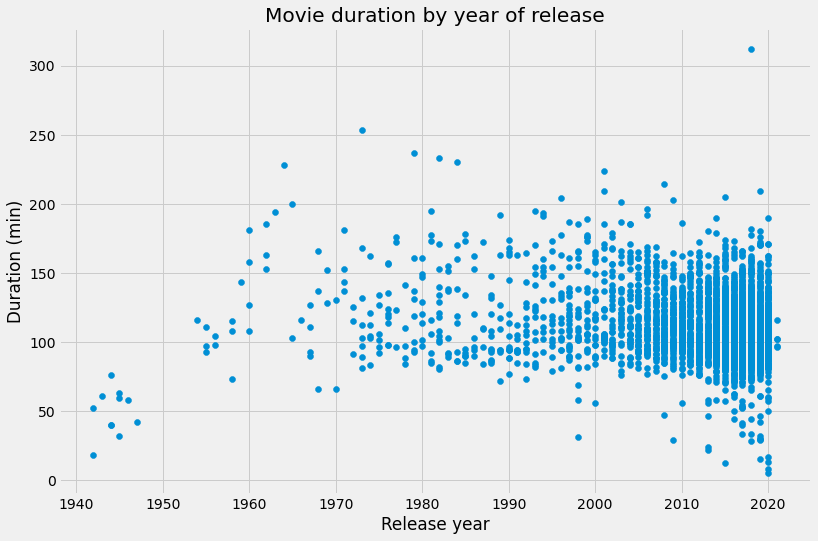

In [55]:
#now plot it again without those shorter duration genre's 
#Set the figure style and initialize a new figure 
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

#Create a scatterplot of duration versus release_year 
plt.scatter(Longer_movies["release_year"], Longer_movies["duration"])

#Create a title and axis labels 
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

#Show the plot 
plt.show


In [57]:
#Define an empty list to store different colors for each genre
colors = []

#get data of each genre 
Action = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Action']

#Iterate over rows of netflix_movies_col_subset
for lab, row, in netflix_movies_col_subset.iterrows(): 
    if row['genre'] == "Children": 
        colors.append("red")
    elif row['genre'] == "Documentaries": 
        colors.append("blue")
    elif row['genre'] == "Stand-Up": 
        colors.append("green")
    else: 
        colors.append("black")

#Inspect the first 10 values in your list 
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

In [58]:
#Create a dataset of each genre
Action = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Action']
Classic_Movies = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Classic Movies']
Dramas = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Dramas']
International_Movies = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'International Movies']
Sci_Fi = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Sci-Fi']
Comedies = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Comedies']
Cult_Movies = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Cult Movies']
LGBTQ_Movies = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'LGBTQ Movies']
Independent_Movies  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Independent Movies']
Horor_Movies  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Horror Movies']
Thrillers  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Thrillers']
Anime_Features  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Anime Features']
Music  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Music']
Sports_Movies  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Sports Movies']
Romantic_Movies  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Romantic Movies']
Documentaries  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Documentaries']
Children  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Children']
Stand_Up  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Stand-UP']
Uncategorized  = netflix_movies_col_subset[netflix_movies_col_subset["genre"] == 'Uncategorized']


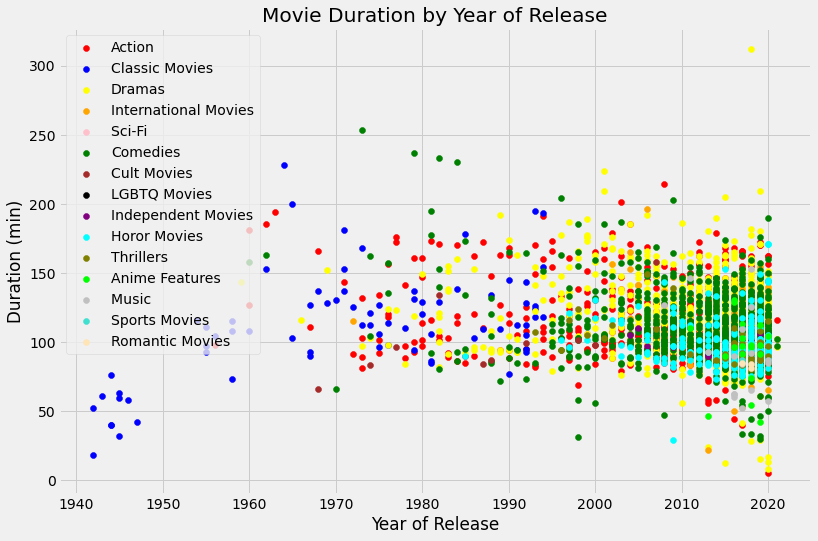

In [60]:
#Plot by color 
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(12,8))

#
plt.scatter(Action["release_year"], Action["duration"],c="red", label="Action")
plt.scatter(Classic_Movies["release_year"], Classic_Movies["duration"],c="blue", label="Classic Movies")
plt.scatter(Dramas["release_year"], Dramas["duration"],c="yellow", label="Dramas")
plt.scatter(International_Movies["release_year"], International_Movies["duration"],c="orange", label="International Movies")
plt.scatter(Sci_Fi ["release_year"], Sci_Fi ["duration"],c="pink", label="Sci-Fi ")
plt.scatter(Comedies["release_year"], Comedies["duration"],c="green", label="Comedies")
plt.scatter(Cult_Movies["release_year"], Cult_Movies["duration"],c="brown", label="Cult Movies")
plt.scatter(LGBTQ_Movies["release_year"], LGBTQ_Movies["duration"],c="black", label="LGBTQ Movies")
plt.scatter(Independent_Movies["release_year"], Independent_Movies["duration"],c="purple", label="Independent Movies")
plt.scatter(Horor_Movies["release_year"], Horor_Movies["duration"],c="cyan", label="Horor Movies")
plt.scatter(Thrillers["release_year"], Thrillers["duration"],c="olive", label="Thrillers")
plt.scatter(Anime_Features["release_year"], Anime_Features["duration"],c= "lime", label="Anime Features")
plt.scatter(Music ["release_year"], Music ["duration"],c="silver", label="Music ")
plt.scatter(Sports_Movies ["release_year"], Sports_Movies ["duration"],c="turquoise", label="Sports Movies ")
plt.scatter(Romantic_Movies["release_year"], Romantic_Movies["duration"],c="moccasin", label="Romantic Movies")

plt.legend()
plt.title("Movie Duration by Year of Release")
plt.xlabel("Year of Release")
plt.ylabel("Duration (min)")

plt.show()

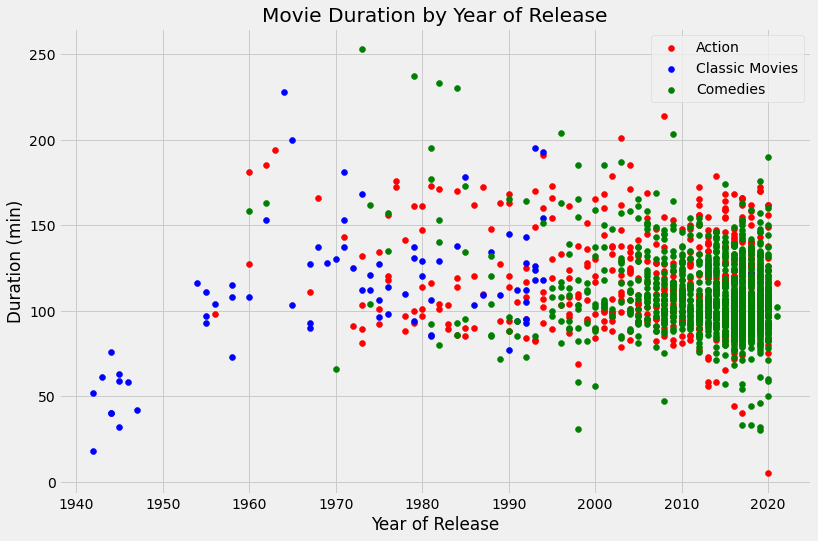

In [61]:
#Plot by color 
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(12,8))

#
plt.scatter(Action["release_year"], Action["duration"],c="red", label="Action")
plt.scatter(Classic_Movies["release_year"], Classic_Movies["duration"],c="blue", label="Classic Movies")
plt.scatter(Comedies["release_year"], Comedies["duration"],c="green", label="Comedies")

plt.legend()
plt.title("Movie Duration by Year of Release")
plt.xlabel("Year of Release")
plt.ylabel("Duration (min)")

plt.show()


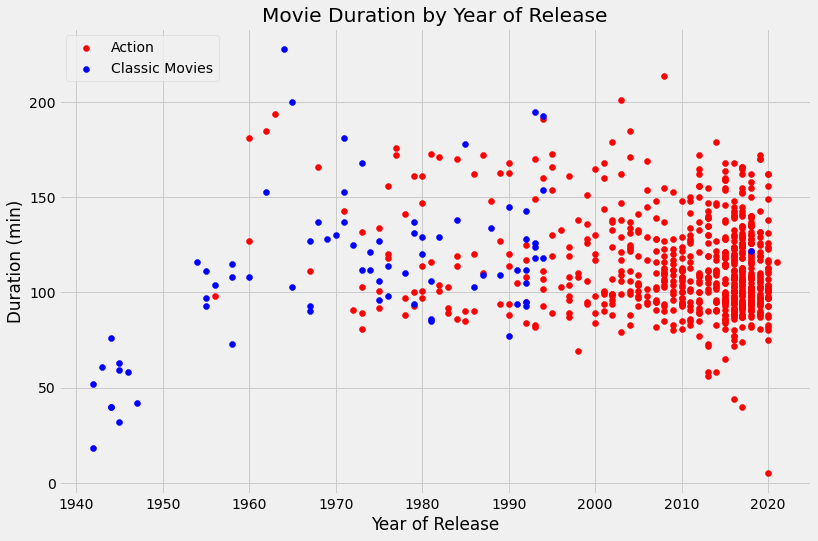

In [62]:
#Plot by color 
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(12,8))

#
plt.scatter(Action["release_year"], Action["duration"],c="red", label="Action")
plt.scatter(Classic_Movies["release_year"], Classic_Movies["duration"],c="blue", label="Classic Movies")

plt.legend()
plt.title("Movie Duration by Year of Release")
plt.xlabel("Year of Release")
plt.ylabel("Duration (min)")

plt.show()

In [ ]:
#Find all the unique genre and unique countries 


In [ ]:
#create a graph with legends grouped by genre, country 



In [53]:
#Group by mean duration of all genre 
genre_mean_full_table = netflix_movies_col_subset.groupby("genre")["duration"].mean()
#genre_mean_full_table

#pivot_table 
genre_mean_full_pivot_table = netflix_movies_col_subset.pivot_table(values = 'duration', index = "genre")
genre_mean_full_pivot_table.sort_values("duration", ascending = False)


,duration
genre,
Action,113.282940
Classic Movies,112.428571
Dramas,111.796243
International Movies,109.464912
Sci-Fi,108.090909
Comedies,107.200186
Cult Movies,100.500000
LGBTQ Movies,99.000000
Independent Movies,98.700000


In [40]:
#Do statistics on this 
#Summaries by group 
#Group by genre mean duration pivot table 

genre_duration_mean_table = Longer_movies.groupby("genre")["duration"].mean()
genre_duration_mean_table

genre
Action                  113.282940
Anime Features           93.368421
Classic Movies          112.428571
Comedies                107.200186
Cult Movies             100.500000
Dramas                  111.796243
Horror Movies            97.401639
Independent Movies       98.700000
International Movies    109.464912
LGBTQ Movies             99.000000
Music                    91.117647
Romantic Movies          83.333333
Sci-Fi                  108.090909
Sports Movies            87.000000
Thrillers                97.244898
Name: duration, dtype: float64

In [49]:
genre_mean_pivot_table = Longer_movies.pivot_table(values = "duration", index = "genre")
genre_mean_pivot_table.sort_values("duration", ascending = False)

,duration
genre,
Action,113.282940
Classic Movies,112.428571
Dramas,111.796243
International Movies,109.464912
Sci-Fi,108.090909
Comedies,107.200186
Cult Movies,100.500000
LGBTQ Movies,99.000000
Independent Movies,98.700000


In [ ]:
#organized the pivot table so it lists the longest films first 

In [47]:
#group by countries mean duration pivot table
country_mean = Longer_movies.groupby("country")['duration'].mean()
country_mean


country
Argentina          97.323529
Australia         105.433333
Austria            97.750000
Bangladesh        115.500000
Belgium           112.250000
                     ...    
United Kingdom    104.543689
United States     101.507601
Uruguay            95.500000
Vietnam           104.250000
Zimbabwe          100.000000
Name: duration, Length: 71, dtype: float64

In [61]:
country_mean_pivot_table = Longer_movies.pivot_table(values = 'duration', index = "country")
top_ten = country_mean_pivot_table.sort_values("duration", ascending = False)
top_ten[:10]


,duration
country,
Croatia,157.000000
Soviet Union,147.000000
India,129.119190
Pakistan,128.117647
Romania,124.888889
Iran,123.000000
South Korea,122.388889
Georgia,119.000000
Somalia,118.000000


In [70]:
#Count the number of films from each country 
#Get the top 20 countries with the most films 
netflix_movies_col_subset["country"].value_counts()[:20]

United States     2100
India              883
United Kingdom     341
Canada             175
France             137
Spain              119
Egypt               93
Mexico              79
Turkey              78
Japan               75
Indonesia           74
Hong Kong           74
Philippines         74
Germany             68
Nigeria             63
Australia           56
Brazil              52
Argentina           50
China               48
South Korea         42
Name: country, dtype: int64

In [71]:
#Count the number of films of each genre
#Get the top 20 genre with the most films 
netflix_movies_col_subset["genre"].value_counts()[:20]


Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
Sports Movies              1
LGBTQ Movies               1
Name: genre, dtype: int64

In [75]:
#Just looking at United States alone 
US = netflix_movies_col_subset[netflix_movies_col_subset["country"]=="United States"]
US_genre = US["genre"].value_counts()
US_genre


Documentaries         397
Dramas                377
Comedies              328
Children              290
Action                245
Stand-Up              207
Horror Movies         111
Classic Movies         42
Thrillers              40
Uncategorized          22
Independent Movies     13
Music                  10
Cult Movies             9
Sci-Fi                  6
Romantic Movies         2
Anime Features          1
Name: genre, dtype: int64

In [80]:
#US shortened (top 9 occurrences)
US_subset = US[-US["genre"].isin(['Anime Features', 'Romantic Movies', 'Sci-Fi', 'Cult Movies', 'Music', 'Independent Movies', 'Uncategorized'])]


,title,country,genre,release_year,duration
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
7,187,United States,Dramas,1997,119
10,1922,United States,Dramas,2017,103
25,(T)ERROR,United States,Documentaries,2015,84
...,...,...,...,...,...
7757,Zach Galifianakis: Live at the Purple Onion,United States,Stand-Up,2006,61
7758,Zack and Miri Make a Porno,United States,Comedies,2008,101
7771,Zion,United States,Documentaries,2018,12
7778,Zombieland,United States,Comedies,2009,88


/Users/kazouavang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


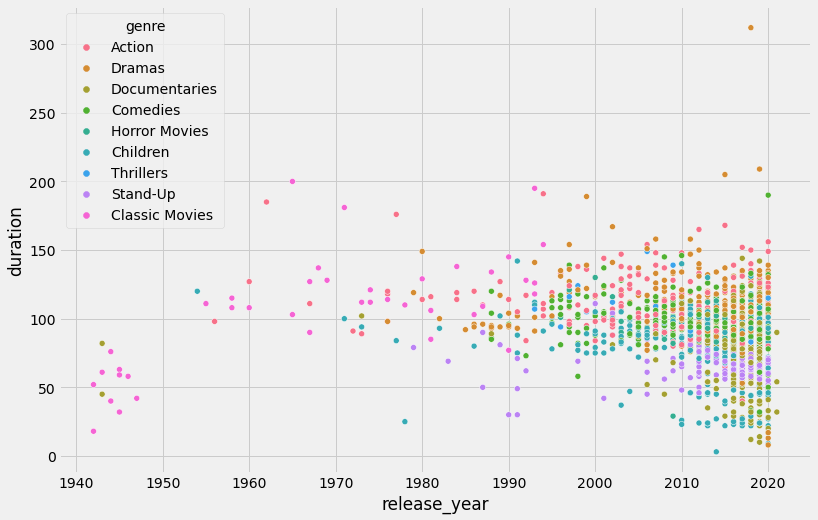

In [81]:
#Plot US Subset 
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(12,8))

#Create Scatterplot 
import seaborn as sns
sns.scatterplot("release_year", "duration", data=US_subset, hue='genre')

plt.show()

In [76]:
#get average duration of films from U.S. 
US_duration_genre_avg = US.pivot_table(values="duration", index = "genre")
US_duration_genre_avg.sort_values("duration", ascending = False)


,duration
genre,
Sci-Fi,109.833333
Action,108.428571
Dramas,104.965517
Classic Movies,103.880952
Independent Movies,98.000000
Cult Movies,97.888889
Thrillers,97.775000
Comedies,96.576220
Horror Movies,92.117117


In [70]:
#Are we certain that movies are getting shorter? 
are_movies_getting_shorter = "maybe"

In [ ]:
#For the United States only, obtain the avg. duration for each year. 

/Users/kazouavang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


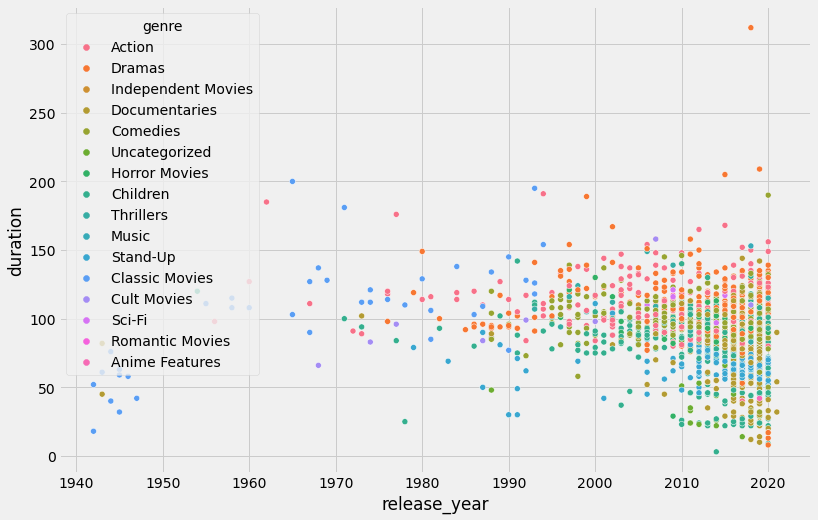

In [79]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(12,8))
#Create Scatterplot 
import seaborn as sns
sns.scatterplot("release_year", "duration", data=US, hue='genre')

plt.show()

In [ ]:
#Try plotting this (Bar Chart)


Questions to explore: 
1) Eventually I would want to know if the duration of a film affects it's rating? Might have to try to use API for this to get rating of films. Maybe from IBDM. 